Імпортуємо необхідні бібліотеки для роботи з даними.

In [119]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

Завантажимо вбудований в scikit-learn набір даних Iris, переіменуємо його стовпці та переглянемо його перші рядки.

In [120]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Переглянемо опис та інформацію про дані, звідки бачимо, що в цьому датасеті немає відсутніх значень.

In [121]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Побудуємо гістограми розподілу для кожного стовпця.

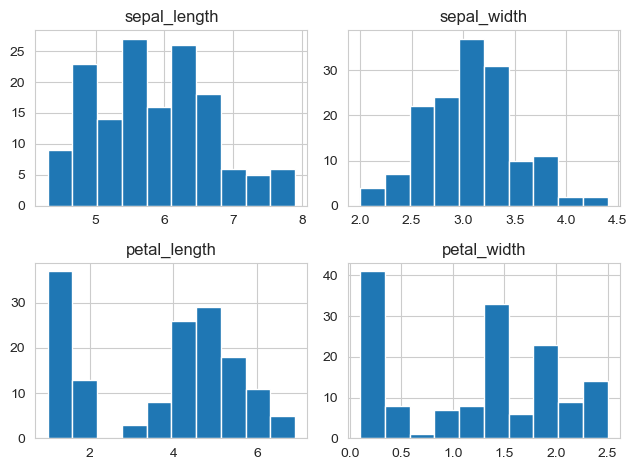

In [122]:
iris_df.hist()
plt.tight_layout()
plt.show()

Побудуємо діаграму розсіювання для даних Іриси, використовуючи бібліотеку Seaborn.

C:\Users\winte\anaconda3\envs\megaHard\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


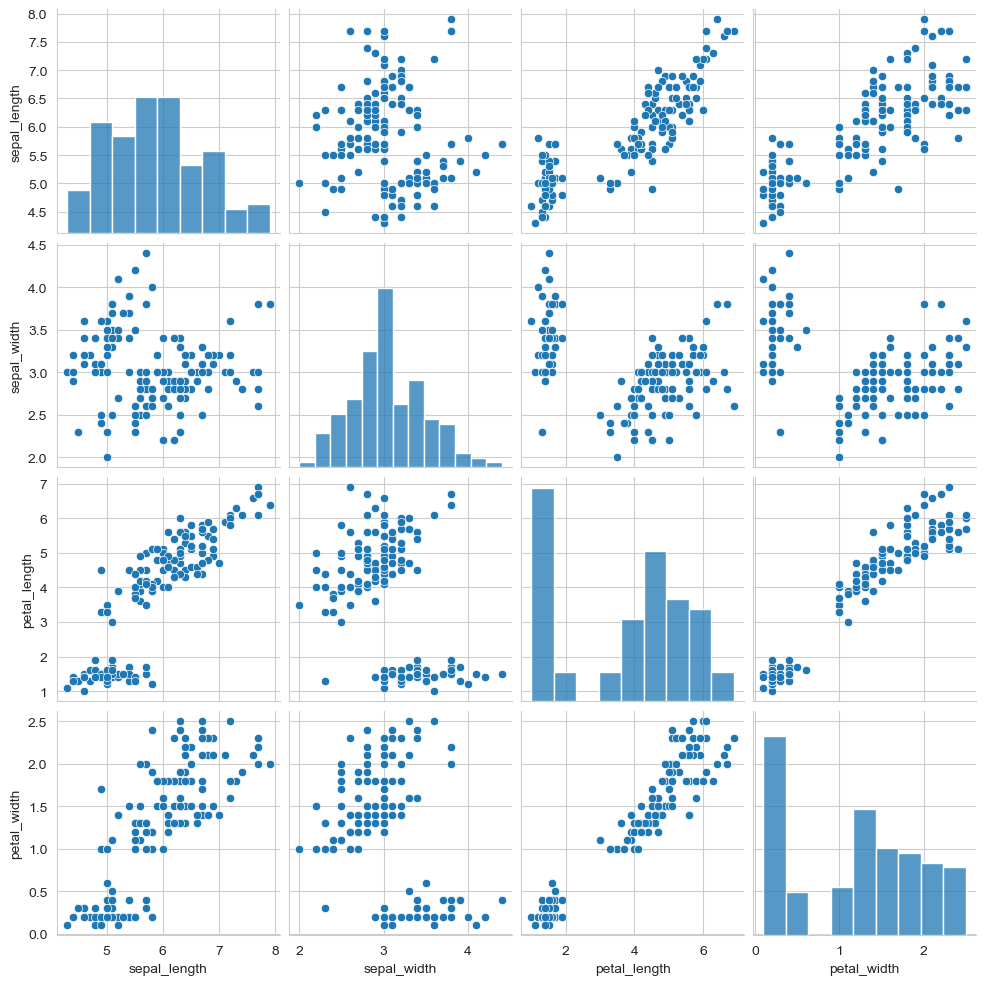

In [123]:
sns.pairplot(iris_df)
plt.show()

Розіб'ємо дані на навчальні та тестові набори. Замість стандартного співвідношення 75% для навчання і 25% для тестування, змінимо його на 80% для навчання і 20% для тестування.

In [124]:
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Створимо послідовну модель двошарового персептрону, де:
1-й повнозв'язний шар: 8 нейронів, input_shape вказує форму вхідних даних, які визначаються кількістю ознак у датасеті (4 ознаки);
2-й повнозв'язний шар (вихідний): 3 нейрони (кількість класів - видів ірисів), функція активації softmax для багатокласової класифікації.
Останній шар виділяє ймовірності належності вхідних даних до різних класів

Компілюємо модель, задаючи оптимізатор, функцію втрати і метрики.

In [125]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Запустимо процес тренування моделі з такими аргументами:
X_train, y_train: тренувальні дані та відповідні мітки класів
epochs: кількість епох тренування
batch_size: розмір пакета (кількість прикладів даних, які обробляються в одній ітерації)
validation_data: дані, які використовуються для перевірки

Розмір пакета було обрано 16. Так як датасет відносно невеликий (150 рядків та 4 ознаки), використання невеликого розміру пакета дає кращу збалансованість між оновленнями ваг, адже оновлення ваги буде частіше. Також це допомагає уникнути перенавчання та ефективно керувати пам'яттю.

In [126]:
history100 = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 1s 46ms/step - loss: 2.3541 - accuracy: 0.3250 - val_loss: 2.2091 - val_accuracy: 0.3667
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 2.1553 - accuracy: 0.3250 - val_loss: 2.0401 - val_accuracy: 0.3667
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 1.9892 - accuracy: 0.3250 - val_loss: 1.8903 - val_accuracy: 0.3667
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 1.8478 - accuracy: 0.3250 - val_loss: 1.7627 - val_accuracy: 0.3667
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 1.7095 - accuracy: 0.3250 - val_loss: 1.6586 - val_accuracy: 0.3667
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 1.6055 - accuracy: 0.3250 - val_loss: 1.5619 - val_accuracy: 0.3667
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 1.5075 - accuracy: 0.3000 - val_loss: 1.4753 - val_accuracy: 0.3667
Epoch 8/100
8/8 [===

Створимо функцію для побудови графіків точності та втрат на основі історії навчання моделі.

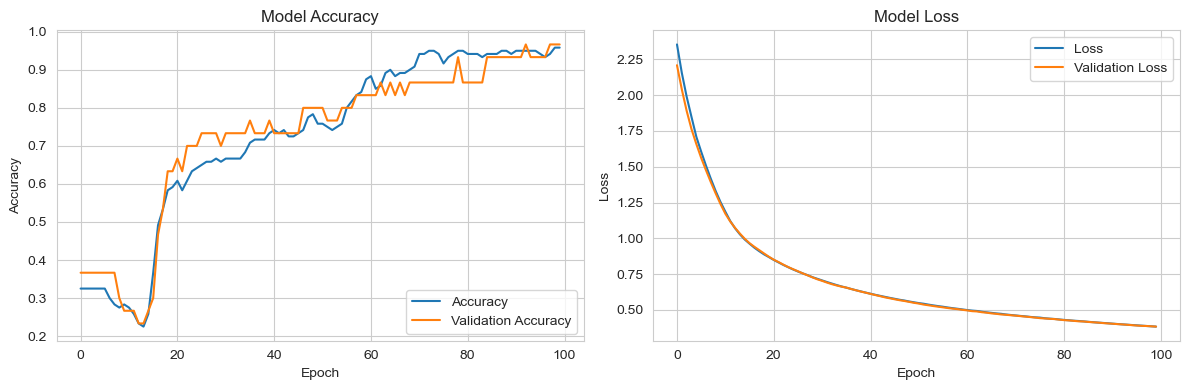

In [127]:
def build_accuracy_loss_plot(history):
    # accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend(loc='lower right')
    
    # loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

build_accuracy_loss_plot(history=history100)

На графіку видно, що точність моделі поступово збільшується з кожною епохою навчання і на останній ітерації маємо результат дуже наближений до 1. Втрати моделі поступово зменшуються, це означає, що модель постійно прогресує в навчанні.

Загалом можна зробити висновок, що модель добре навчається і прогнозує результати.

Реалізуємо алгоритм k найближчих сусідів за допомогою оцінювача KNeighborsClassifier.
Викликаємо метод fit об'єкта KNeighborsClassifier (knn), який завантажує навчальний набір зразків (X_train) і навчальний набір цільових значень (y_train) в оцінювача:


In [128]:
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)
predicted = knn_classifier.predict(X=X_test)
expected = y_test

Обчислимо точність моделі.
Бачимо, що модель показала дуже високу точність.


In [129]:
print(f'Точність моделі: {knn_classifier.score(X_test, y_test):.2%}')

Точність моделі: 100.00%


Побудуємо матрицю невідповідностей.
Матриця містить інформацію про правильно і неправильно прогнозованих значення (також званих влученнями і промахами) для заданого класу.


In [130]:
conf_matrix = confusion_matrix(expected, predicted)
print(f"Confusion Matrix:\n {conf_matrix}")

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


З цієї матриці видно, що модель дала дуже хороші результати для всіх трьох класів, оскільки всі ненульові елементи матриці розташовані на діагоналі, тобто не містять помилок. Такий результат є ідеальним і вказує на те, що модель повністю точно класифікувала всі приклади відповідно до їхніх фактичних класів.

Виведемо звіт класифікації.
За допомогою нього можна побачити більш розширену інформацію, порівняно до матриці невідповідностей.

In [131]:
class_report = classification_report(expected, predicted, target_names=iris.target_names)
print(f"Classification Report:\n {class_report}")

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Усі ці показники свідчать про дуже високу якість класифікації моделі, де всі класи були ідеально класифіковані з точністю, повнотою та F1-оцінкою 1.00.

Проведемо експеримент і збільшимо кількість епох до 500.

Epoch 1/500
8/8 [==============================] - 1s 71ms/step - loss: 2.9151 - accuracy: 0.3250 - val_loss: 2.6043 - val_accuracy: 0.3667
Epoch 2/500
8/8 [==============================] - 0s 11ms/step - loss: 2.7613 - accuracy: 0.3250 - val_loss: 2.4787 - val_accuracy: 0.3667
Epoch 3/500
8/8 [==============================] - 0s 11ms/step - loss: 2.6341 - accuracy: 0.3250 - val_loss: 2.3640 - val_accuracy: 0.3667
Epoch 4/500
8/8 [==============================] - 0s 11ms/step - loss: 2.5052 - accuracy: 0.3250 - val_loss: 2.2586 - val_accuracy: 0.3667
Epoch 5/500
8/8 [==============================] - 0s 11ms/step - loss: 2.3915 - accuracy: 0.3250 - val_loss: 2.1600 - val_accuracy: 0.3667
Epoch 6/500
8/8 [==============================] - 0s 11ms/step - loss: 2.2825 - accuracy: 0.3250 - val_loss: 2.0672 - val_accuracy: 0.3667
Epoch 7/500
8/8 [==============================] - 0s 12ms/step - loss: 2.1852 - accuracy: 0.3250 - val_loss: 1.9743 - val_accuracy: 0.3667
Epoch 8/500
8/8 [===

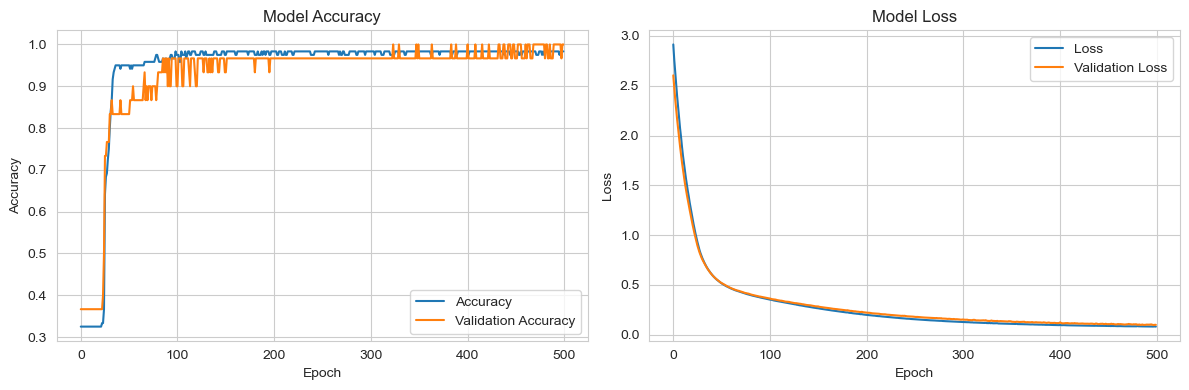

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history500 = model.fit(X_train, y_train, epochs=500, batch_size=16, validation_data=(X_test, y_test))

build_accuracy_loss_plot(history=history500)

Як ми бачимо, зі збільшенням кількості епох, кінцеві тренувальна та тестова точності суттєво не змінюються, але після 150 епохи точність класифікації на тестових даних стабільно сягає 1. те ж саме стосується втрат, вони перестають зменшуватися суттєво після 100 епохи, тобто можна зробити висновок що в цьому випадку для навчання двошаровому персептрону не потрібно так багато епох.

Збільшення епох до 500 також може посприяти появі явища перенавчання. Воно виникає, коли модель занадто добре навчається на тренувальних даних, але погано справляється з новими даними, які вона не бачила раніше.

Ось як це можна визначити:
Точність моделі: Якщо лінія точності тренування продовжує зростати або залишається стабільною, але лінія точності перевірки починає падати, це може бути ознакою перенавчання.
Втрати моделі: Якщо лінія втрат тренування продовжує падати або залишається стабільною, але лінія втрат перевірки починає зростати, це також може бути ознакою перенавчання.

Як бачимо, перенавчання не відбулось, бо результати на тестових даних не погіршуються, а залишаються стабільними.

Проведемо ще один експеримент і створимо одношаровий персептрон замість двошарового.
Тепер маємо лише 1 шар з 3х нейронів (кількість класів ірисів) та 4 входи за кількістю ознак у датасеті (4 ознаки).

In [137]:
X, y = iris.data, iris.target

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# одношаровий персептрон
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='softmax', input_shape=(X.shape[1],))
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Навчимо модель та порівняємо її графіки з двошаровим персептроном.

Epoch 1/100
8/8 [==============================] - 1s 35ms/step - loss: 4.8250 - accuracy: 0.3333 - val_loss: 4.5491 - val_accuracy: 0.3333
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 4.6672 - accuracy: 0.3333 - val_loss: 4.3825 - val_accuracy: 0.3333
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 4.5172 - accuracy: 0.3333 - val_loss: 4.2185 - val_accuracy: 0.3333
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 4.3504 - accuracy: 0.3333 - val_loss: 4.0650 - val_accuracy: 0.3333
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 4.2055 - accuracy: 0.3333 - val_loss: 3.9084 - val_accuracy: 0.3333
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 4.0568 - accuracy: 0.3333 - val_loss: 3.7583 - val_accuracy: 0.3333
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 3.9212 - accuracy: 0.3333 - val_loss: 3.6130 - val_accuracy: 0.3333
Epoch 8/100
8/8 [=========

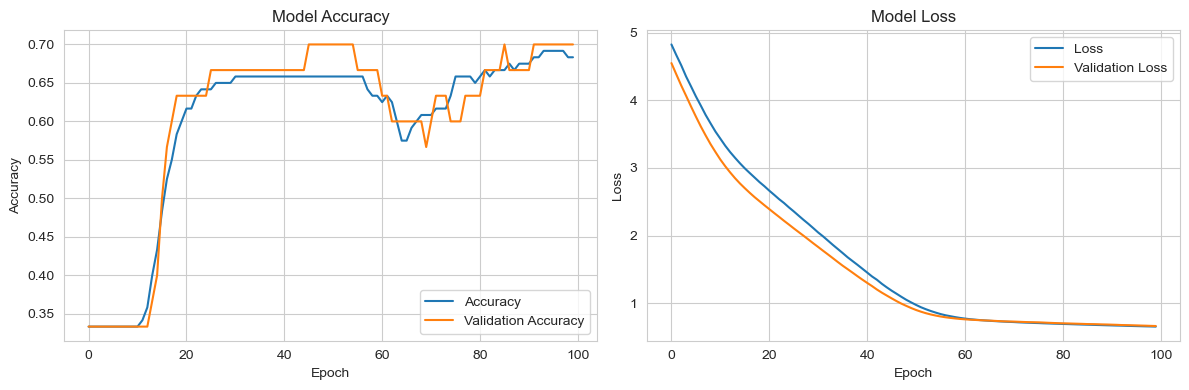

In [134]:
history100_onelayer = model.fit(X_train2, y_train2, epochs=100, batch_size=16, validation_data=(X_test2, y_test2))

build_accuracy_loss_plot(history100_onelayer)

З побудованого графіку можемо побачити, що одношарова модель навчається повільніше, точність моделі на тестових даних помітно менша за точність двошарового персептрону. Також бачимо, що втрати є в декілька разів більшими, ніж у двошарового персептрону з такою ж кількістю епох.

Висновки:
У результаті лабораторної роботи була навчена модель прямого поширенняна основі датасету Iris. Дана модель з високою точністю та незначними втратами класифікує квіти на три види на основі їх характеристик. За допомогою експерименту ми з’ясували, що двошарова модель навчається швидше ніж одношарова, тобто потребує менше епох для отримання точних результатів. Тому можна зробити висновок, що для цієї задачі класифікації краще підходить саме двошарова модель. Для датасету такої складності вона дає досить точні результати при недовготривалому навчанні.